In [1]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers,Sequential
import matplotlib.pyplot as plt

In [12]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 4500 files belonging to 3 classes.


In [13]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [14]:
len(dataset)

141

In [15]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 2 0 2 1 1 2 2 2 2 0 0 2 2 1 2 1 0 1 2 1 2 2 2 0 1 1 2 1 1 2 2]


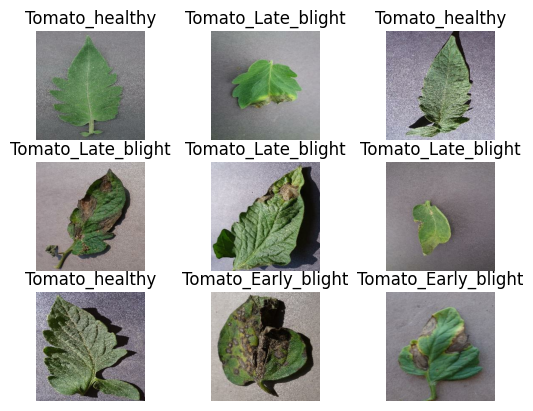

In [16]:
for image_batch,label_batch in dataset.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [17]:
train_size=0.8

In [18]:
len(dataset)*train_size

112.80000000000001

In [19]:
train_ds=dataset.take(112)


In [21]:
test_ds=dataset.skip(112)
len(test_ds)

29

In [22]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [23]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [24]:
test_ds=test_ds.skip(14)
len(test_ds)

15

In [25]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=9)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [26]:
train_ds ,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [27]:
len(train_ds)

112

In [28]:
len(val_ds)

14

In [29]:
len(test_ds)

15

In [30]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale=Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [32]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [33]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

In [34]:
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:
history=model.fit(
    train_ds,
    epochs=30,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
112/112 [==============================] - 260s 2s/step - loss: 0.3108 - accuracy: 0.8779 - val_loss: 0.4301 - val_accuracy: 0.8460
Epoch 2/30
112/112 [==============================] - 159s 1s/step - loss: 0.2641 - accuracy: 0.8852 - val_loss: 0.2763 - val_accuracy: 0.9018
Epoch 3/30
112/112 [==============================] - 152s 1s/step - loss: 0.2284 - accuracy: 0.9015 - val_loss: 0.4224 - val_accuracy: 0.8438
Epoch 4/30
112/112 [==============================] - 121s 1s/step - loss: 0.2786 - accuracy: 0.8819 - val_loss: 0.5025 - val_accuracy: 0.7924
Epoch 5/30
112/112 [==============================] - 166s 1s/step - loss: 0.2799 - accuracy: 0.8833 - val_loss: 0.2559 - val_accuracy: 0.9062
Epoch 6/30
112/112 [==============================] - 155s 1s/step - loss: 0.2281 - accuracy: 0.9054 - val_loss: 0.3452 - val_accuracy: 0.8705
Epoch 7/30
112/112 [==============================] - 146s 1s/step - loss: 0.1980 - accuracy: 0.9169 - val_loss: 0.3442 - val_accuracy: 0.8638

In [54]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 112}

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
history.history['accuracy']

[0.8779395222663879,
 0.8852183818817139,
 0.9014557600021362,
 0.8818588852882385,
 0.8832587003707886,
 0.9053751230239868,
 0.9168533086776733,
 0.9174132347106934,
 0.9274916052818298,
 0.9249719977378845,
 0.9204927086830139,
 0.9322508573532104,
 0.9101343750953674,
 0.9300112128257751,
 0.9395296573638916,
 0.935330331325531,
 0.9440089464187622,
 0.9540873169898987,
 0.9538074135780334,
 0.9532474875450134,
 0.957166850566864,
 0.9482082724571228,
 0.9529675245285034,
 0.9608062505722046,
 0.9666853547096252,
 0.9585666060447693,
 0.956606924533844,
 0.9686450362205505,
 0.9694848656654358,
 0.9708846807479858]

In [57]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

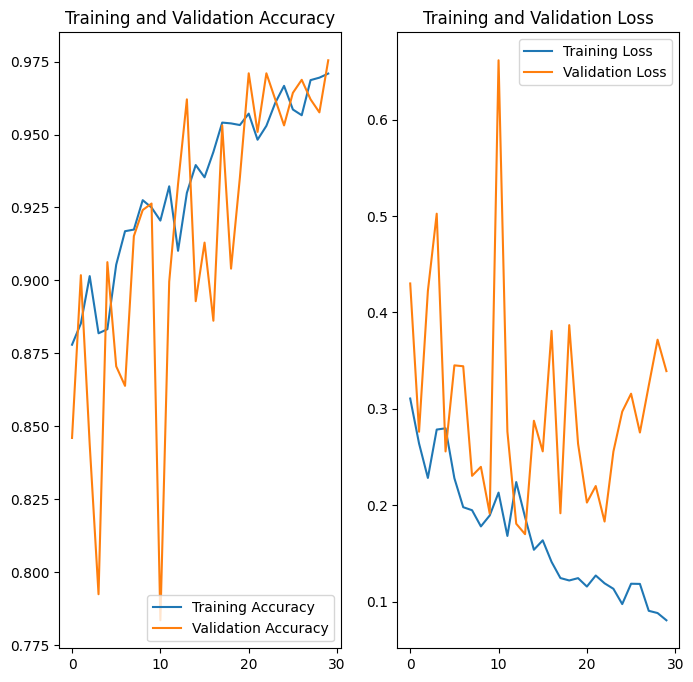

In [58]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 0s 418ms/step
predicted label: Tomato_healthy


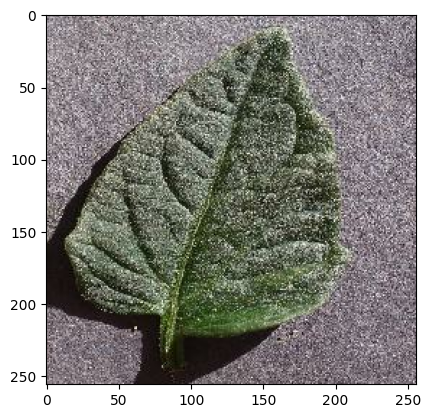

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [62]:
model.save("model.h5")
